# Results analysis

## Importing modules and results data

After running the CluVRP solver for the Golden, Li, and Verolog instances, the 'Plots_Results' folder should be created in the directory, along with three sub-folders containing the results of each instance. After importing the necessary modules for analyzing and visualizing the data, we discover the three CSV files containing the results. Finally, we store them in a list of dataframes called 'instances':

In [2]:
import os 
import pandas as pd
import string
from SolverPackage.Data import *
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi']= 300

current_dir = 'Plots_Results'
csvs = []
# pd.read_csv
# Walk through all the files and directories in the directory
for dir_name, subdir_list, file_list in os.walk(current_dir):
    # Check if the current directory is the "Datasets" folder
    if file_list:
        for file in file_list:
            if file[-3:]=='csv':
                csvs.append(f'{dir_name}\\{file}')

instances = []
for i, csv in enumerate(csvs):
    instances.append(0)
    instances[i]=pd.read_csv(csv)

After running the algorithm first for Golden, then for Li, and lastly, for the verolog instances, we name the rows of each dataframe accordingly:

In [3]:
instances[0].index = ['Golden_'+"{:02d}".format(i) for i in range(1,21)]
instances[1].index = ['Li_'+str(i) for i in range(21,33)]
instances[2].index=['VeRoLogV08_16']
results=pd.concat(instances)

## Calculating additional instance statistics

In the cell below, the average distance between nodes, as well as its standard deviation, are calculated for every instance:

In [4]:
root_dir = "Datasets" # replace with the path to the root directory
xml_dirs = [] #initialize an empty list to store the directories

for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith(".xml"):
            xml_dirs.append(os.path.join(subdir, file))
        
avg_dist=[]
std_dist=[]

for xml in xml_dirs:
    data=None
    data=Data(xml)
    _,_=data.extract_data()
    nodes_df = pd.DataFrame(data.nodes).transpose().apply(pd.to_numeric, errors='coerce')
    nodes_df.index = nodes_df.index.astype(int)
    
    # Define the columns that contain the x and y coordinates
    x_col = "x"
    y_col = "y"

    # Create a list of tuples containing the x and y coordinates of each node
    coords = list(zip(nodes_df[x_col], nodes_df[y_col]))

    # Initialize an empty list to store the distances between nodes
    distances = []

    # Iterate over all possible pairs of nodes
    for i in range(len(coords)):
        for j in range(i+1, len(coords)):
            # Calculate the distance between the two nodes
            dist = distance.euclidean(coords[i], coords[j])
            # Append the distance to the distances list
            distances.append(dist)

    # Calculate the average distance and standard deviation
    average_distance = np.mean(distances)
    std_dev_distance = np.std(distances)
    avg_dist.append(average_distance)
    std_dist.append(std_dev_distance)

We then add the new stats to the dataframe:

In [5]:
# Use the insert() method to add the new columns
results.insert(3 + 1, 'Average distance', avg_dist)
results.insert(3 + 2, 'St.Dev of dist', std_dist)

## Visualizing percentage difference from the initial solution

In the cell below, we calculate the cost percentage difference from the initial solution for all methods to visualize the results. Moreover, the average for soft, hard, and all methods is calculated:

In [6]:
results['A_Cost_pct'] = (results['A_Cost'] - results['I_Cost']) * 100 / results['I_Cost']
results['B_Cost_pct'] = (results['B_Cost'] - results['I_Cost']) * 100 / results['I_Cost']
results['C_Cost_pct'] = (results['C_Cost'] - results['I_Cost']) * 100 / results['I_Cost']
results['D_Cost_pct'] = (results['D_Cost'] - results['I_Cost']) * 100 / results['I_Cost']
results['E_Cost_pct'] = (results['E_Cost'] - results['I_Cost']) * 100 / results['I_Cost']
results['F_Cost_pct'] = (results['F_Cost'] - results['I_Cost']) * 100 / results['I_Cost']
hard_average = results[['A_Cost_pct','B_Cost_pct','C_Cost_pct']].mean().mean()
soft_average = results[['D_Cost_pct','E_Cost_pct','F_Cost_pct']].mean().mean()
total_average = results[['A_Cost_pct','B_Cost_pct','C_Cost_pct','D_Cost_pct','E_Cost_pct','F_Cost_pct']].mean().mean()

Also, we set the accent colors of hard (blue) and soft (orange) clustering for more clarity in our plots:

In [7]:
blue_accents = cm.Blues(np.linspace(0, 1, 5))
orange_accents = cm.Oranges(np.linspace(0, 1, 5))

Finally, we move on to the visualizations:

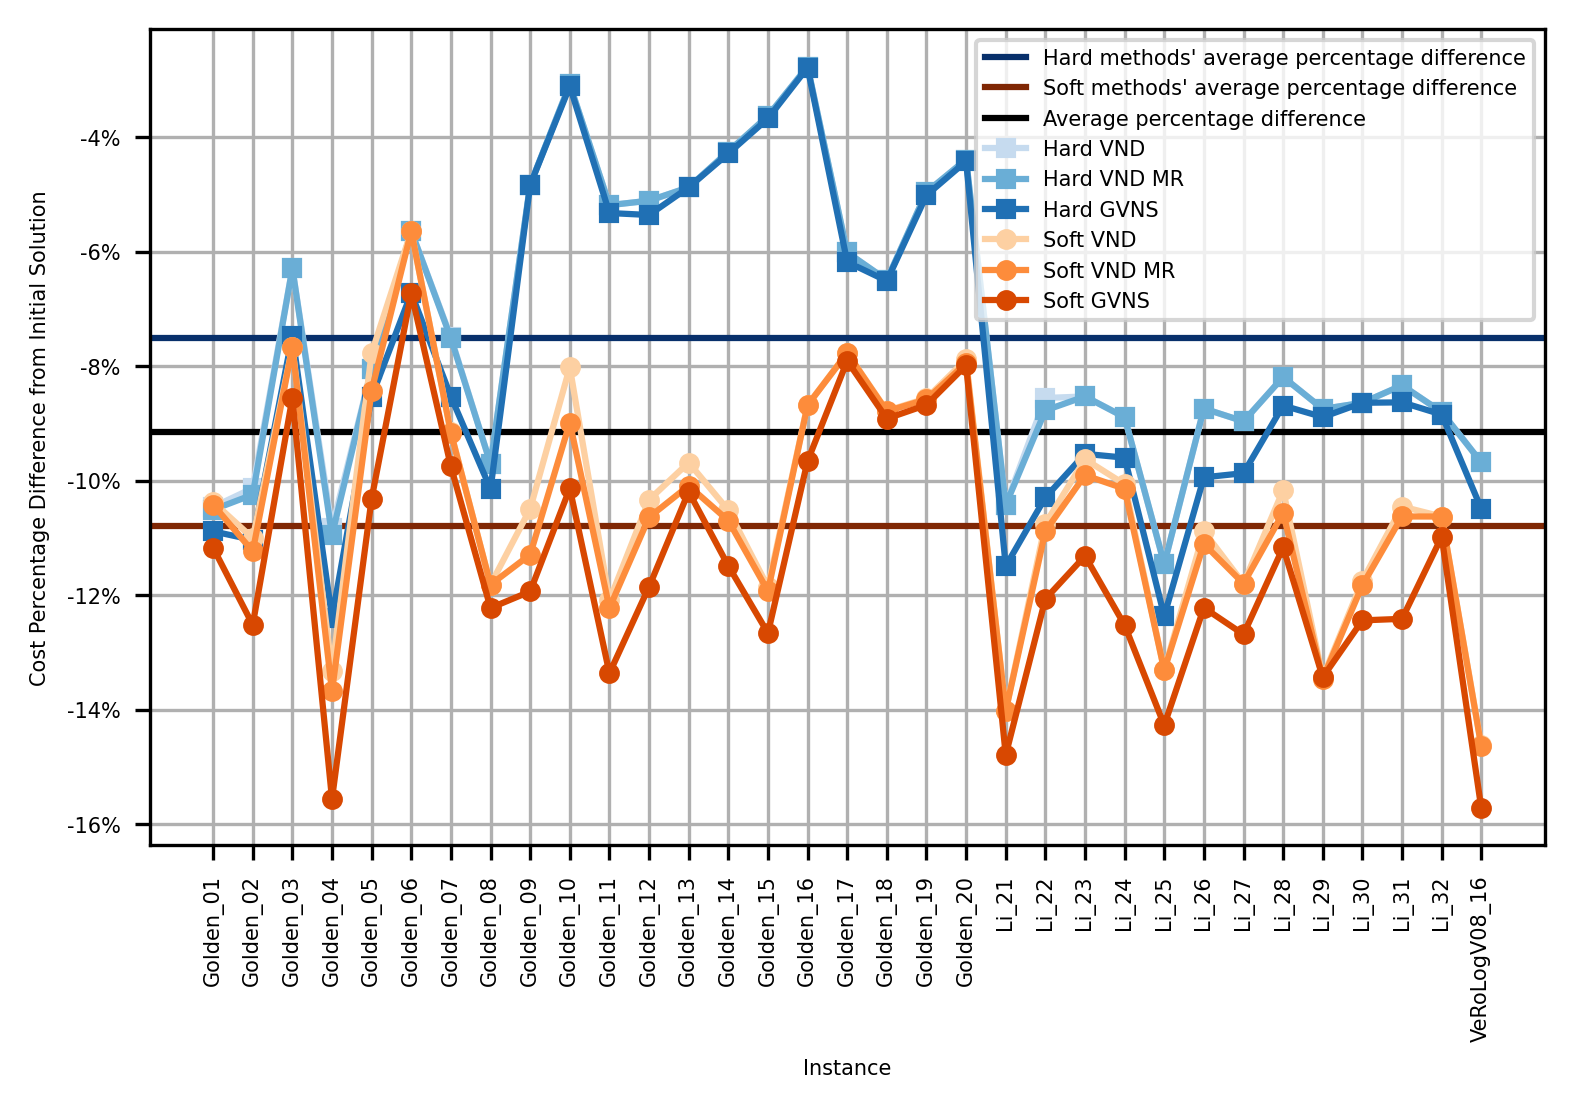

In [8]:
# plot parameters
plt.figure()
plt.rcParams['font.size'] = '5'
plt.grid(True)
plt.axhline(y=hard_average,color=blue_accents[4],label="Hard methods' average percentage difference")
plt.axhline(y=soft_average,color=orange_accents[4],label="Soft methods' average percentage difference")
plt.axhline(y=total_average,color='black',label="Average percentage difference")
plt.plot(results.index, results['A_Cost_pct'], '-s', markersize=4,color=blue_accents[1], label='Hard VND')
plt.plot(results.index, results['B_Cost_pct'], '-s', markersize=4,color=blue_accents[2], label='Hard VND MR')
plt.plot(results.index, results['C_Cost_pct'], '-s', markersize=4,color=blue_accents[3], label='Hard GVNS')
plt.plot(results.index, results['D_Cost_pct'],'-o',markersize=4, color=orange_accents[1], label='Soft VND')
plt.plot(results.index, results['E_Cost_pct'],'-o', markersize=4,color=orange_accents[2], label='Soft VND MR')
plt.plot(results.index, results['F_Cost_pct'],'-o',markersize=4, color=orange_accents[3], label='Soft GVNS')

plt.xlabel('Instance')
plt.ylabel('Cost Percentage Difference from Initial Solution')

# format the y-axis tick labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f}%".format(x)))

# Show the plot
plt.legend()
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.20) # to make more space for the x-label
plt.savefig('Cost_Analysis.jpeg')
plt.show()


In [9]:
 plt.savefig('Cost_Analysis.jpeg')

<Figure size 1800x1200 with 0 Axes>

## Visualizing Time cost for 1% improvement from initial solution

Below we calculate the time cost for a 1% improvement from the initial solution for all methods and the soft, hard, and total averages. We will need these to make the following plots.

In [10]:
results['A_Time_cost'] = (results['A_Time']/results['A_Cost_pct'])*-1
results['B_Time_cost'] = (results['B_Time']/results['B_Cost_pct'])*-1
results['C_Time_cost'] = (results['C_Time']/results['C_Cost_pct'])*-1
results['D_Time_cost'] = (results['D_Time']/results['D_Cost_pct'])*-1
results['E_Time_cost'] = (results['E_Time']/results['E_Cost_pct'])*-1
results['F_Time_cost'] = (results['F_Time']/results['F_Cost_pct'])*-1

thard_average = results[['A_Time_cost','B_Time_cost','C_Time_cost']].mean().mean()*1/60
tsoft_average = results[['D_Time_cost','E_Time_cost','F_Time_cost']].mean().mean()*1/60

taverage = results[['A_Time_cost','B_Time_cost','C_Time_cost','D_Time_cost','E_Time_cost','F_Time_cost']].mean().mean()*1/60


rhard_average = results[['A_Time_cost','C_Time_cost']].mean().mean()
rsoft_average = results[['D_Time_cost','F_Time_cost']].mean().mean()
raverage = results[['A_Time_cost','C_Time_cost','D_Time_cost','F_Time_cost']].mean().mean()

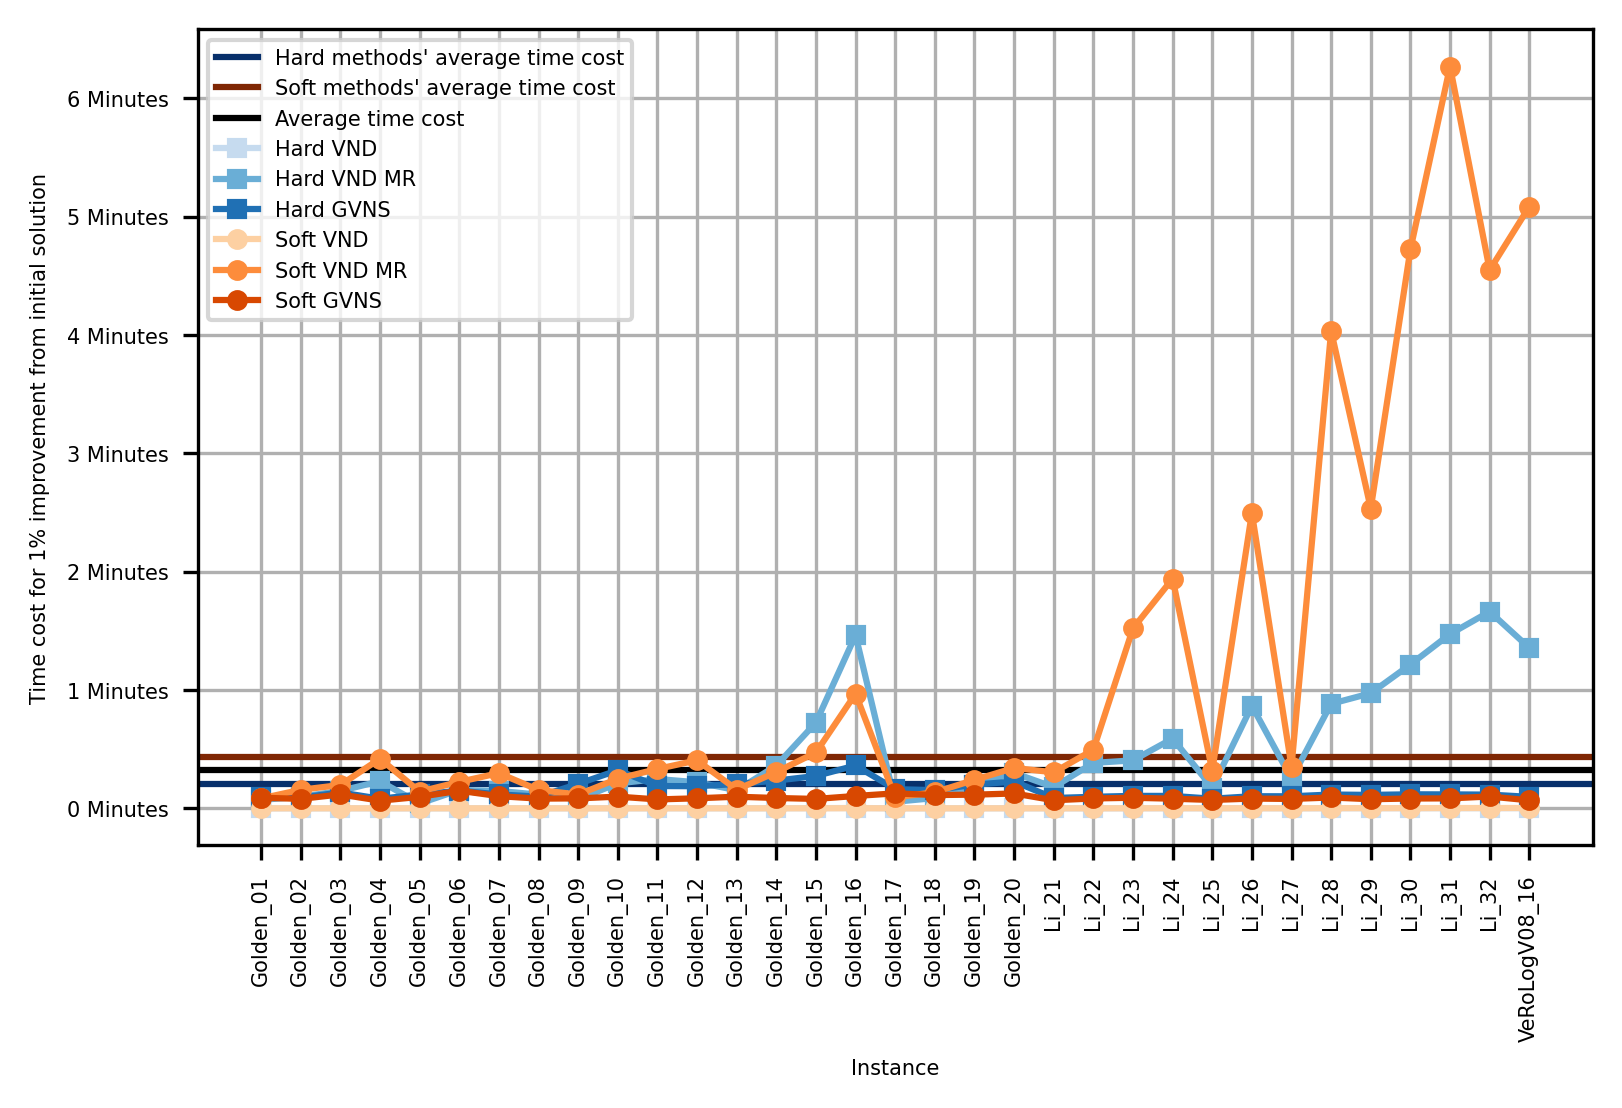

In [11]:
# plot parameters
plt.figure()
plt.rcParams['font.size'] = '5'
plt.grid(True)
plt.axhline(y=thard_average,color=blue_accents[4],label="Hard methods' average time cost")
plt.axhline(y=tsoft_average,color=orange_accents[4],label="Soft methods' average time cost")
plt.axhline(y=taverage,color='black',label="Average time cost")
plt.plot(results.index, results['A_Time_cost']*1/60, '-s', markersize=4,color=blue_accents[1], label='Hard VND')
plt.plot(results.index, results['B_Time_cost']*1/60, '-s', markersize=4,color=blue_accents[2], label='Hard VND MR')
plt.plot(results.index, results['C_Time_cost']*1/60, '-s', markersize=4,color=blue_accents[3], label='Hard GVNS')
plt.plot(results.index, results['D_Time_cost']*1/60,'-o',markersize=4, color=orange_accents[1], label='Soft VND')
plt.plot(results.index, results['E_Time_cost']*1/60,'-o', markersize=4,color=orange_accents[2], label='Soft VND MR')
plt.plot(results.index, results['F_Time_cost']*1/60,'-o',markersize=4, color=orange_accents[3], label='Soft GVNS')

plt.xlabel('Instance')
plt.ylabel('Time cost for 1% improvement from initial solution')

# format the y-axis tick labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f} Minutes".format(x)))

# show the plot
plt.legend()
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.20) # to make more space for the x-label
plt.savefig('Time_cost_Analysis_A.jpeg')
plt.show()

As the VND MR methods skew the results, we isolate the rest techniques:

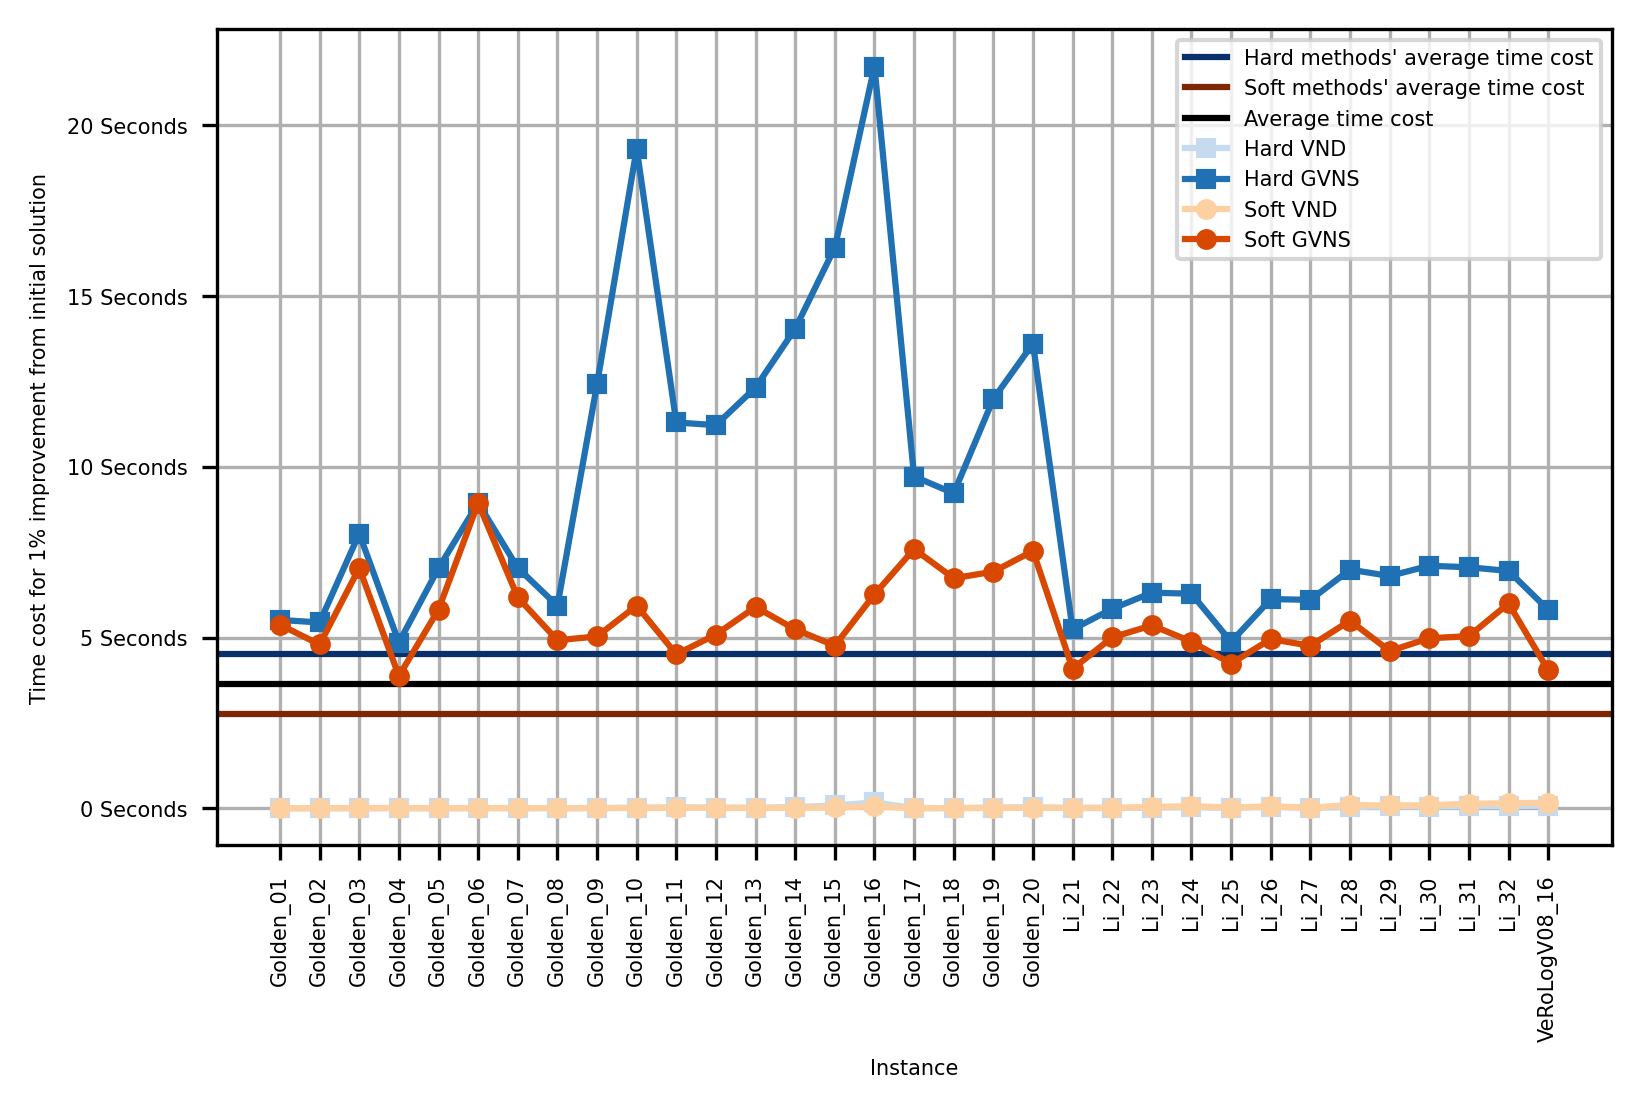

In [12]:
# plot parameters
plt.figure()
plt.rcParams['font.size'] = '5'
plt.grid(True)
plt.axhline(y=rhard_average,color=blue_accents[4],label="Hard methods' average time cost")
plt.axhline(y=rsoft_average,color=orange_accents[4],label="Soft methods' average time cost")
plt.axhline(y=raverage,color='black',label="Average time cost")
plt.plot(results.index, results['A_Time_cost'], '-s', markersize=4,color=blue_accents[1], label='Hard VND')
plt.plot(results.index, results['C_Time_cost'], '-s', markersize=4,color=blue_accents[3], label='Hard GVNS')
plt.plot(results.index, results['D_Time_cost'],'-o',markersize=4, color=orange_accents[1], label='Soft VND')
plt.plot(results.index, results['F_Time_cost'],'-o',markersize=4, color=orange_accents[3], label='Soft GVNS')

plt.xlabel('Instance')
plt.ylabel('Time cost for 1% improvement from initial solution')

# format the y-axis tick labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f} Seconds".format(x)))

# Show the plot
plt.legend()
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.20) # to make more space for the x-label
plt.savefig('Time_cost_Analysis_B.jpeg')
plt.show()

## Visualizing computational time per instance

In [13]:
thard_average = results[['A_Time','B_Time','C_Time']].mean().mean()*1/60
tsoft_average = results[['D_Time','E_Time','F_Time']].mean().mean()*1/60
taverage = results[['A_Time','B_Time','C_Time','D_Time','E_Time','F_Time']].mean().mean()*1/60

rhard_average = results['A_Time'].mean()
rsoft_average = results['D_Time'].mean()
raverage = results[['A_Time','D_Time']].mean().mean()

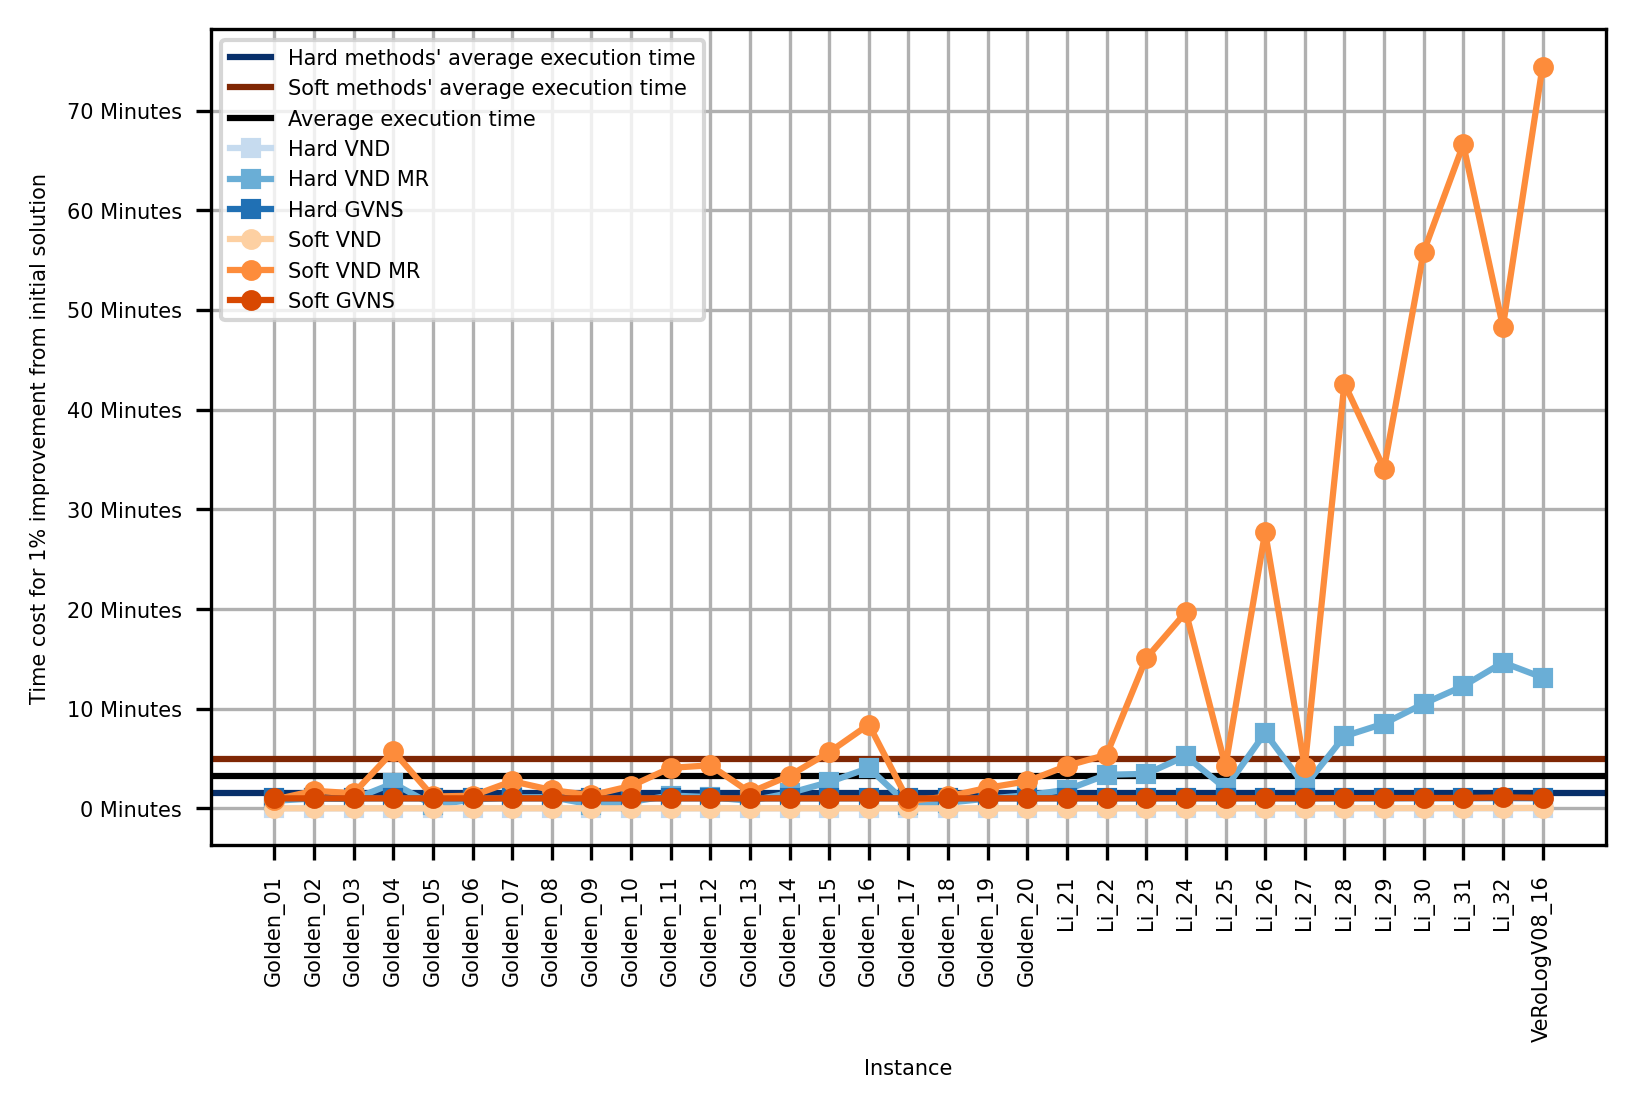

In [14]:
plt.figure()
plt.rcParams['font.size'] = '5'
plt.grid(True)
plt.axhline(y=thard_average,color=blue_accents[4],label="Hard methods' average execution time")
plt.axhline(y=tsoft_average,color=orange_accents[4],label="Soft methods' average execution time")
plt.axhline(y=taverage,color='black',label="Average execution time")
plt.plot(results.index, results['A_Time']*1/60, '-s', markersize=4,color=blue_accents[1], label='Hard VND')
plt.plot(results.index, results['B_Time']*1/60, '-s', markersize=4,color=blue_accents[2], label='Hard VND MR')
plt.plot(results.index, results['C_Time']*1/60, '-s', markersize=4,color=blue_accents[3], label='Hard GVNS')
plt.plot(results.index, results['D_Time']*1/60,'-o',markersize=4, color=orange_accents[1], label='Soft VND')
plt.plot(results.index, results['E_Time']*1/60,'-o', markersize=4,color=orange_accents[2], label='Soft VND MR')
plt.plot(results.index, results['F_Time']*1/60,'-o',markersize=4, color=orange_accents[3], label='Soft GVNS')

plt.xlabel('Instance')
plt.ylabel('Time cost for 1% improvement from initial solution')

# format the y-axis tick labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f} Minutes".format(x)))

# Show the plot
plt.legend()
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.20) # to make more space for the x-label
plt.savefig('Time_Analysis_A.jpeg')
plt.show()

Same as before, VND MR skews the results. Also, we know for a fact that the GVNS runs for a fixed amount of time. Thus we isolate the simple VND methods to inspect how the computational time changes per instance:

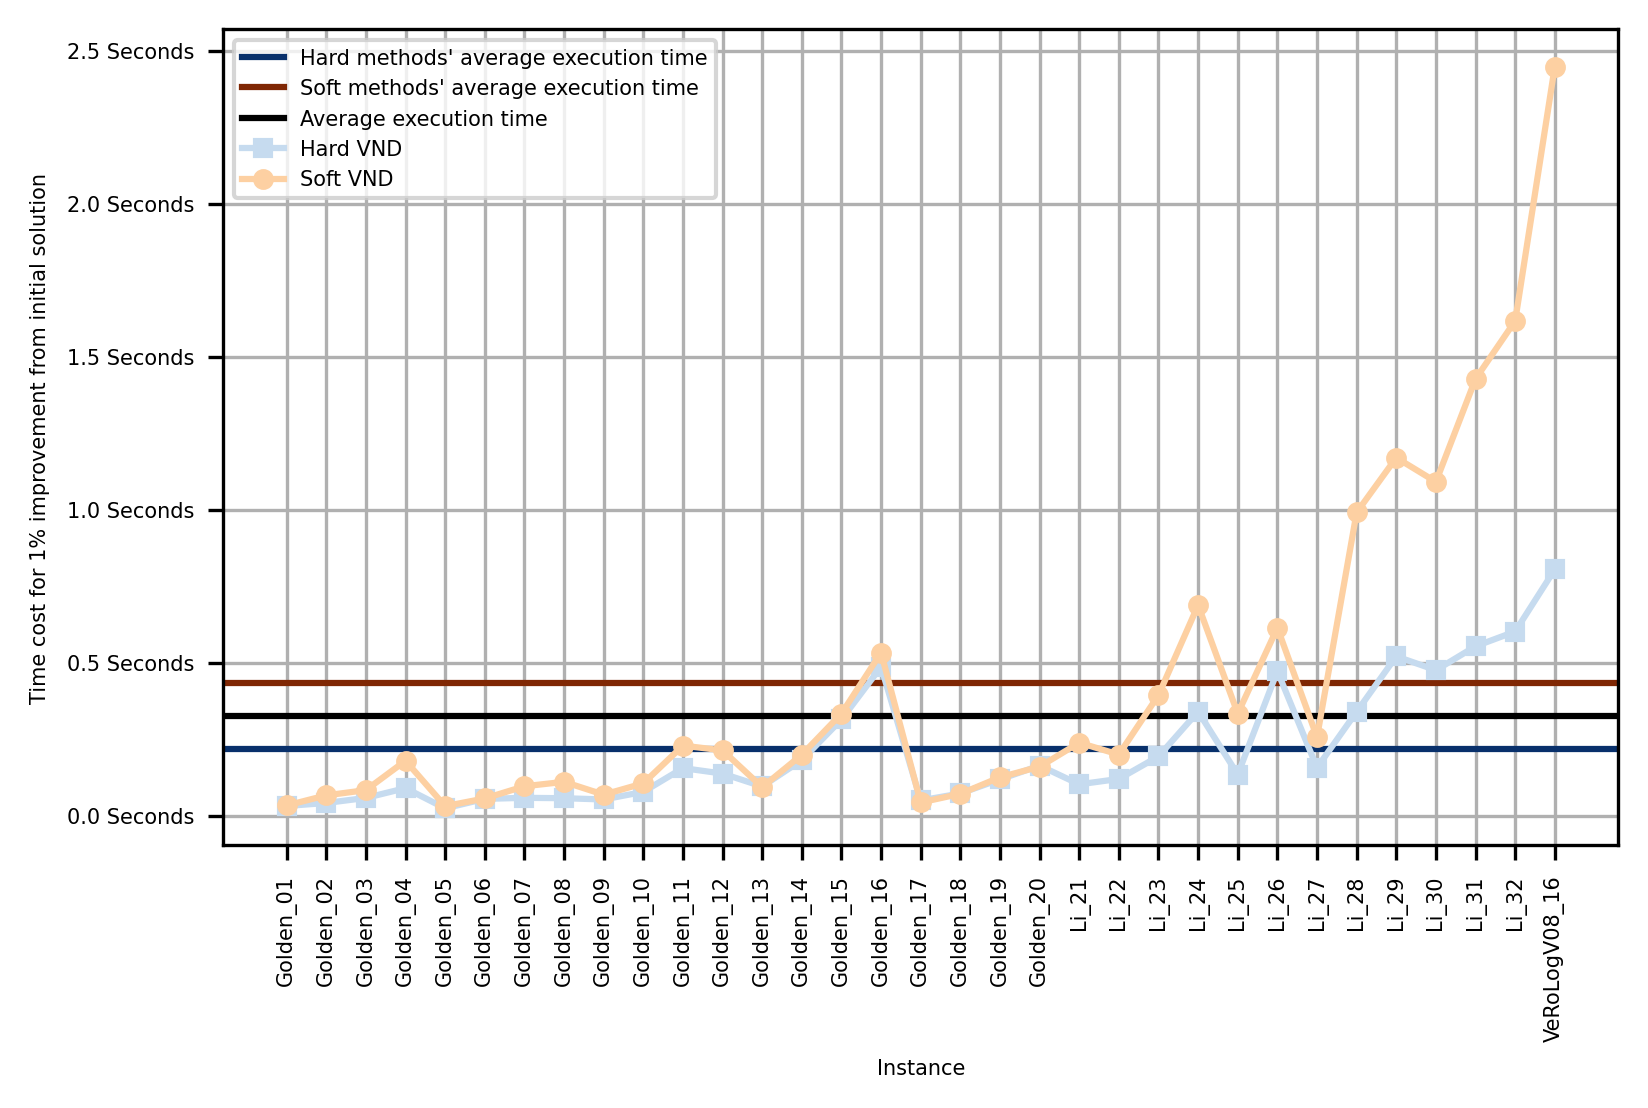

In [15]:
plt.figure()
plt.rcParams['font.size'] = '5'
plt.grid(True)
plt.axhline(y=rhard_average,color=blue_accents[4],label="Hard methods' average execution time")
plt.axhline(y=rsoft_average,color=orange_accents[4],label="Soft methods' average execution time")
plt.axhline(y=raverage,color='black',label="Average execution time")
plt.plot(results.index, results['A_Time'], '-s', markersize=4,color=blue_accents[1], label='Hard VND')
# plt.plot(results.index, results['C_Time'], '-s', markersize=4,color=blue_accents[3], label='Hard GVNS')
plt.plot(results.index, results['D_Time'],'-o',markersize=4, color=orange_accents[1], label='Soft VND')
# plt.plot(results.index, results['F_Time'],'-o',markersize=4, color=orange_accents[3], label='Soft GVNS')

plt.xlabel('Instance')
plt.ylabel('Time cost for 1% improvement from initial solution')

# format the y-axis tick labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.1f} Seconds".format(x)))

# Show the plot
plt.legend()
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.20) # to make more space for the x-label
plt.savefig('Time_Analysis_B.jpeg')
plt.show()

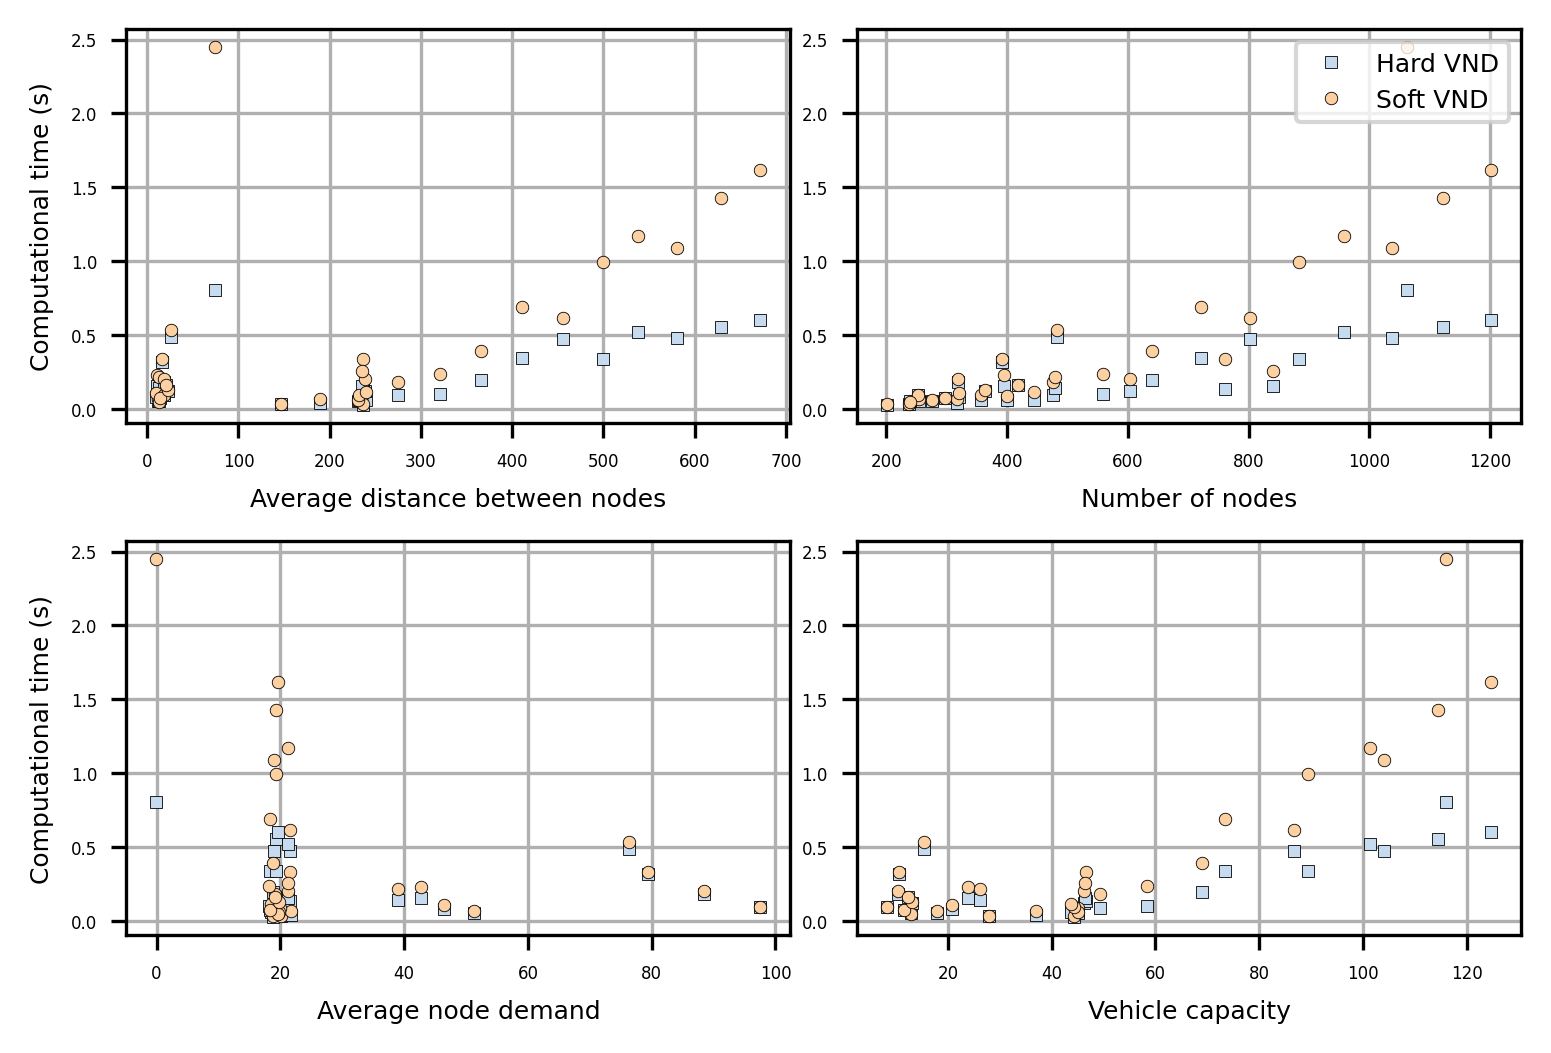

In [16]:
jitter=np.random.uniform(low=-5, high=5, size=33)
plt.rcParams['font.size'] = '6'
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(results['Average distance']+jitter, results['A_Time'],marker='s',markersize=3 ,linestyle="None",color=blue_accents[1], label='Hard VND',markeredgecolor='black',markeredgewidth=0.2)
axs[0, 0].plot(results['Average distance']+jitter, results['D_Time'],marker='o',markersize=3 ,linestyle="None", color=orange_accents[1], label='Soft VND',markeredgecolor='black',markeredgewidth=0.2)
for tick in axs[0, 0].xaxis.get_ticklabels():
    tick.set_fontsize(4)
for tick in axs[0, 0].yaxis.get_ticklabels():
    tick.set_fontsize(4)
axs[0, 0].set_xlabel('Average distance between nodes', fontsize=6)
axs[0, 0].set_ylabel('Computational time (s)', fontsize=6)
axs[0, 0].grid(True)


axs[0, 1].plot(results['Number of nodes']+jitter, results['A_Time'],marker='s',markersize=3 ,linestyle="None",color=blue_accents[1], label='Hard VND',markeredgecolor='black',markeredgewidth=0.2)
axs[0, 1].plot(results['Number of nodes']+jitter, results['D_Time'],marker='o',markersize=3 ,linestyle="None",color=orange_accents[1], label='Soft VND',markeredgecolor='black',markeredgewidth=0.2)
for tick in axs[0, 1].xaxis.get_ticklabels():
    tick.set_fontsize(4)
for tick in axs[0, 1].yaxis.get_ticklabels():
    tick.set_fontsize(4)
axs[0, 1].set_xlabel('Number of nodes', fontsize=6)
axs[0, 1].legend(loc='upper right',facecolor='white')
axs[0, 1].grid(True)

jitter=np.random.uniform(low=-2, high=2, size=33)
axs[1, 0].plot(results['Average node demand']+jitter, results['A_Time'],marker='s',markersize=3 ,linestyle="None",color=blue_accents[1], label='Hard VND',markeredgecolor='black',markeredgewidth=0.2)
axs[1, 0].plot(results['Average node demand']+jitter, results['D_Time'],marker='o',markersize=3 ,linestyle="None", color=orange_accents[1], label='Soft VND',markeredgecolor='black',markeredgewidth=0.2)
for tick in axs[1, 0].xaxis.get_ticklabels():
    tick.set_fontsize(4)
for tick in axs[1, 0].yaxis.get_ticklabels():
    tick.set_fontsize(4)
axs[1, 0].set_xlabel('Average node demand', fontsize=6)
axs[1, 0].set_ylabel('Computational time (s)', fontsize=6)
axs[1, 0].grid(True)

axs[1, 1].plot(results['Vehicle Capacity']/results['Average node demand']+jitter, results['A_Time'],marker='s',markersize=3 ,linestyle="None",color=blue_accents[1], label='Hard VND',markeredgecolor='black',markeredgewidth=0.2)
axs[1, 1].plot(results['Vehicle Capacity']/results['Average node demand']+jitter, results['D_Time'],marker='o',markersize=3 ,linestyle="None", color=orange_accents[1], label='Soft VND',markeredgecolor='black',markeredgewidth=0.2)
for tick in axs[1, 1].xaxis.get_ticklabels():
    tick.set_fontsize(4)
for tick in axs[1, 1].yaxis.get_ticklabels():
    tick.set_fontsize(4)
axs[1, 1].set_xlabel('Vehicle capacity', fontsize=6)
axs[1, 1].grid(True)
plt.subplots_adjust(hspace=0.3, wspace=0.1)
plt.savefig('Total_Time_Analysis_B.jpeg')

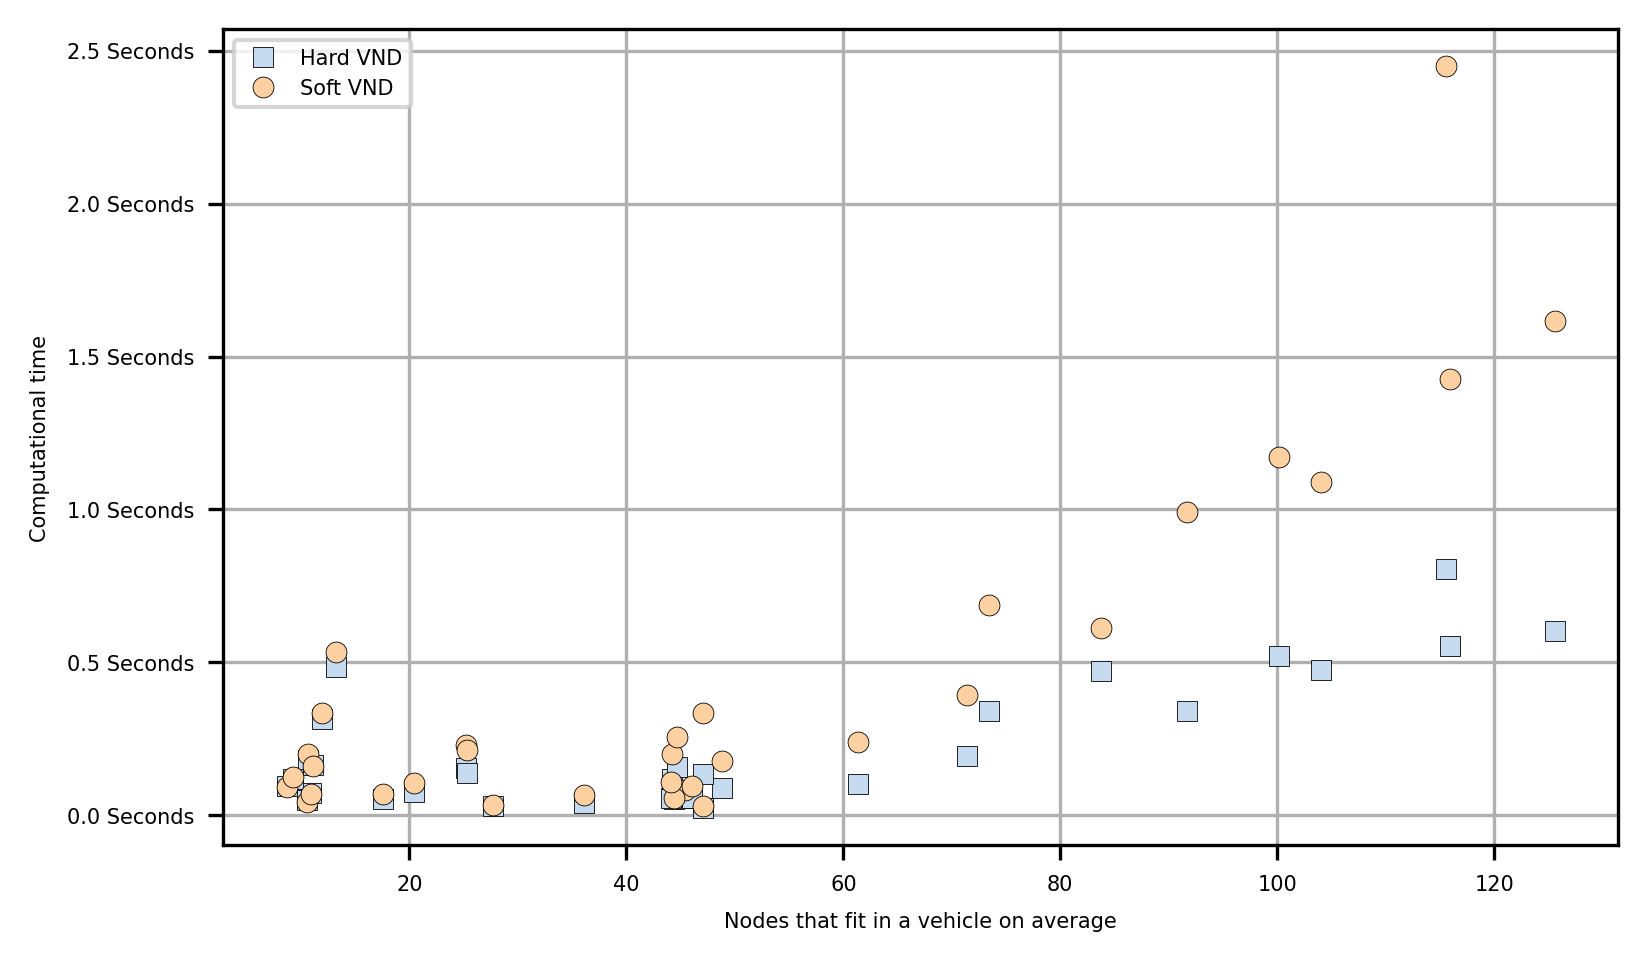

In [17]:
jitter=np.random.uniform(low=-2, high=2, size=33)
plt.figure()
plt.rcParams['font.size'] = '5'
plt.grid(True)

# add jitter to prevent markers from sitting on top of each other
plt.plot(results['Vehicle Capacity']/results['Average node demand']+jitter, results['A_Time'],marker='s',markersize=5 ,linestyle="None",color=blue_accents[1], label='Hard VND',markeredgecolor='black',markeredgewidth=0.2)
plt.plot(results['Vehicle Capacity']/results['Average node demand']+jitter, results['D_Time'],marker='o',markersize=5 ,linestyle="None", color=orange_accents[1], label='Soft VND',markeredgecolor='black',markeredgewidth=0.2)

plt.xlabel('Nodes that fit in a vehicle on average')
plt.ylabel('Computational time')

# format the y-axis tick labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.1f} Seconds".format(x)))

# Show the plot
plt.legend()
plt.subplots_adjust(bottom=0.20) # to make more space for the x-label
plt.savefig('Vehicle_Capacity_Analysis.jpeg')
plt.show()

In [18]:
results_new = pd.melt(results.copy(), id_vars=['other_columns_you_want_to_keep'],
                      value_vars=['A_Time','B_Time','C_Time','D_Time','E_Time','F_Time','A_Cost','B_Cost','C_Time','D_Time','E_Time','F_Time'], var_name='Optimisation method', value_name='sales')
results.to_csv('all_results.csv', index=True)

Detailed comments regarding the plots in this notebook can be found on the accompaning report in my Github:https://github.com/kalligas/CluVRP/blob/master/Report/KALLIGAS_MICHAIL_2822103.pdf